In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Load Titanic Dataset

In [ ]:
df = pd.read_csv('/content/titanic.csv')

### Preview Dataset

In [ ]:
print("Original Titanic Dataset:\n", df.head())

Original Titanic Dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450  

### Handling Missing Values

In [ ]:
print("Missing Values Before Handling:\n", df.isna().sum())

Missing Values Before Handling:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.drop(columns=['Cabin'], inplace=True)  # Drop sparse column

In [ ]:
print("\nMissing Values After Handling:\n", df.isna().sum())


Missing Values After Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Binning for Noise Handling

In [ ]:
# Original 'Age' column for comparison
age_column = df['Age']

# Equal-Width Binning for Smoothing
bins = pd.cut(age_column, bins=4)  # Divide 'Age' into 4 equal-width bins
df['Age_Smoothed_Mean'] = age_column.groupby(bins).transform('mean')  # Replace with mean
df['Age_Smoothed_Median'] = age_column.groupby(bins).transform('median')  # Replace with median

# Smoothing by Bin Boundaries
def smooth_bin_boundaries(value, bin_intervals):
    for interval in bin_intervals:
        if value >= interval.left and value <= interval.right:
            return interval.left if abs(value - interval.left) < abs(value - interval.right) else interval.right

bin_intervals = pd.cut(age_column, bins=4).cat.categories
df['Age_Smoothed_Boundaries'] = age_column.apply(lambda x: smooth_bin_boundaries(x, bin_intervals))

<ipython-input-18-8f3b692dca4c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Age_Smoothed_Mean'] = age_column.groupby(bins).transform('mean')  # Replace with mean
<ipython-input-18-8f3b692dca4c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Age_Smoothed_Median'] = age_column.groupby(bins).transform('median')  # Replace with median



Smoothed Age Columns:
    Age  Age_Smoothed_Mean  Age_Smoothed_Median  Age_Smoothed_Boundaries
0  22.0          28.890569                 28.0                   20.315
1  38.0          28.890569                 28.0                   40.210
2  26.0          28.890569                 28.0                   20.315
3  35.0          28.890569                 28.0                   40.210
4  35.0          28.890569                 28.0                   40.210


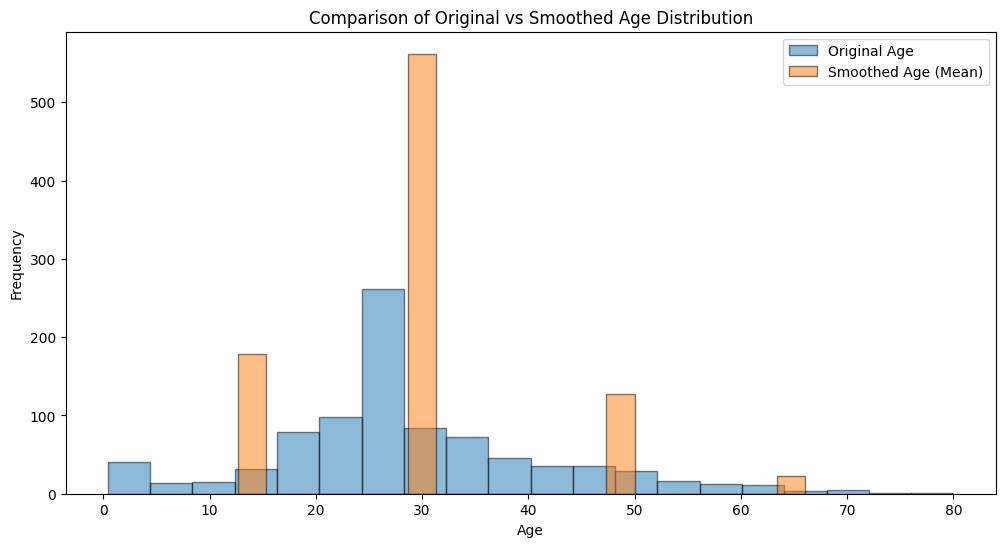

In [ ]:
# View Smoothed Columns
print("\nSmoothed Age Columns:")
print(df[['Age', 'Age_Smoothed_Mean', 'Age_Smoothed_Median', 'Age_Smoothed_Boundaries']].head())

# Visualizing the Smoothed Data
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=20, alpha=0.5, label='Original Age', edgecolor='k')
plt.hist(df['Age_Smoothed_Mean'], bins=20, alpha=0.5, label='Smoothed Age (Mean)', edgecolor='k')
plt.legend()
plt.title('Comparison of Original vs Smoothed Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Min-Max Normalization (e.g., Age)

In [ ]:
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
df['Age_MinMax'] = scaler_minmax.fit_transform(df[['Age']])

### Z-Score Normalization (e.g., Fare)

In [ ]:
scaler_zscore = StandardScaler()
df['Fare_ZScore'] = scaler_zscore.fit_transform(df[['Fare']])

### Decimal Scaling (e.g., Fare)

In [ ]:
def decimal_scaling(column):
    max_abs_value = np.max(np.abs(column))
    scaling_factor = 10 ** np.ceil(np.log10(max_abs_value))
    return column / scaling_factor

df['Fare_Decimal'] = decimal_scaling(df['Fare'])